In [1]:
from netCDF4 import Dataset
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize) #array 전부 보이게

data

In [2]:
precip_raw=Dataset(r'./precip.mon.mean.nc','r')
air_raw=Dataset(r'./air.mon.mean.nc','r')

In [3]:
precip_rawdata=precip_raw.variables['precip'][:]
air_rawdata=air_raw.variables['air'][:]

In [4]:
precip_lat_data=precip_raw.variables['lat'][:]
print(precip_lat_data),len(precip_lat_data)#좌하단부터 시작

[-88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 -68.75 -66.25
 -63.75 -61.25 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 -41.25
 -38.75 -36.25 -33.75 -31.25 -28.75 -26.25 -23.75 -21.25 -18.75 -16.25
 -13.75 -11.25  -8.75  -6.25  -3.75  -1.25   1.25   3.75   6.25   8.75
  11.25  13.75  16.25  18.75  21.25  23.75  26.25  28.75  31.25  33.75
  36.25  38.75  41.25  43.75  46.25  48.75  51.25  53.75  56.25  58.75
  61.25  63.75  66.25  68.75  71.25  73.75  76.25  78.75  81.25  83.75
  86.25  88.75]


(None, 72)

In [5]:
precip_lon_data=precip_raw.variables['lon'][:]
print(precip_lon_data),len(precip_lon_data),72*144

[  1.25   3.75   6.25   8.75  11.25  13.75  16.25  18.75  21.25  23.75
  26.25  28.75  31.25  33.75  36.25  38.75  41.25  43.75  46.25  48.75
  51.25  53.75  56.25  58.75  61.25  63.75  66.25  68.75  71.25  73.75
  76.25  78.75  81.25  83.75  86.25  88.75  91.25  93.75  96.25  98.75
 101.25 103.75 106.25 108.75 111.25 113.75 116.25 118.75 121.25 123.75
 126.25 128.75 131.25 133.75 136.25 138.75 141.25 143.75 146.25 148.75
 151.25 153.75 156.25 158.75 161.25 163.75 166.25 168.75 171.25 173.75
 176.25 178.75 181.25 183.75 186.25 188.75 191.25 193.75 196.25 198.75
 201.25 203.75 206.25 208.75 211.25 213.75 216.25 218.75 221.25 223.75
 226.25 228.75 231.25 233.75 236.25 238.75 241.25 243.75 246.25 248.75
 251.25 253.75 256.25 258.75 261.25 263.75 266.25 268.75 271.25 273.75
 276.25 278.75 281.25 283.75 286.25 288.75 291.25 293.75 296.25 298.75
 301.25 303.75 306.25 308.75 311.25 313.75 316.25 318.75 321.25 323.75
 326.25 328.75 331.25 333.75 336.25 338.75 341.25 343.75 346.25 348.75
 351.2

(None, 144, 10368)

In [6]:
air_lat_data=air_raw.variables['lat'][:]
print(air_lat_data),len(air_lat_data)#좌상단부터 시작

[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]


(None, 73)

In [11]:
air_lon_data=air_raw.variables['lon'][:]
print(air_lon_data),len(air_lon_data)

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]


(None, 144)

preprocessing

In [12]:
all_data=[]
for i in range(72):
    for j in range(144):
        line=[]
        for k in range(504):
            line.append(precip_rawdata[k][i][j])
        all_data.append(line)
for i in range(73):
    for j in range(144):
        line=[]
        for k in range(373,877):
            line.append(air_rawdata[k][i][j])
        all_data.append(line)

In [13]:
np.unique(list(map(len, all_data))),len(all_data)

(array([504]), 20880)

finding optimal k

In [39]:
from sklearn.cluster import KMeans
sse=[]
def elbow(X):
    for i in range(5,25):
        km=KMeans(n_clusters=i)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(5,25),sse,'o-')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

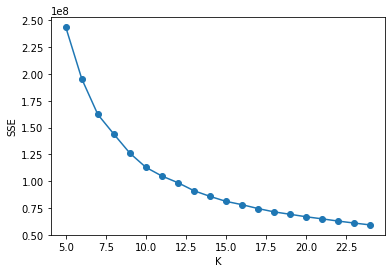

In [40]:
elbow(all_data)

kmeans clustering

In [74]:
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=13)
KMeans.fit(all_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\yunju\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


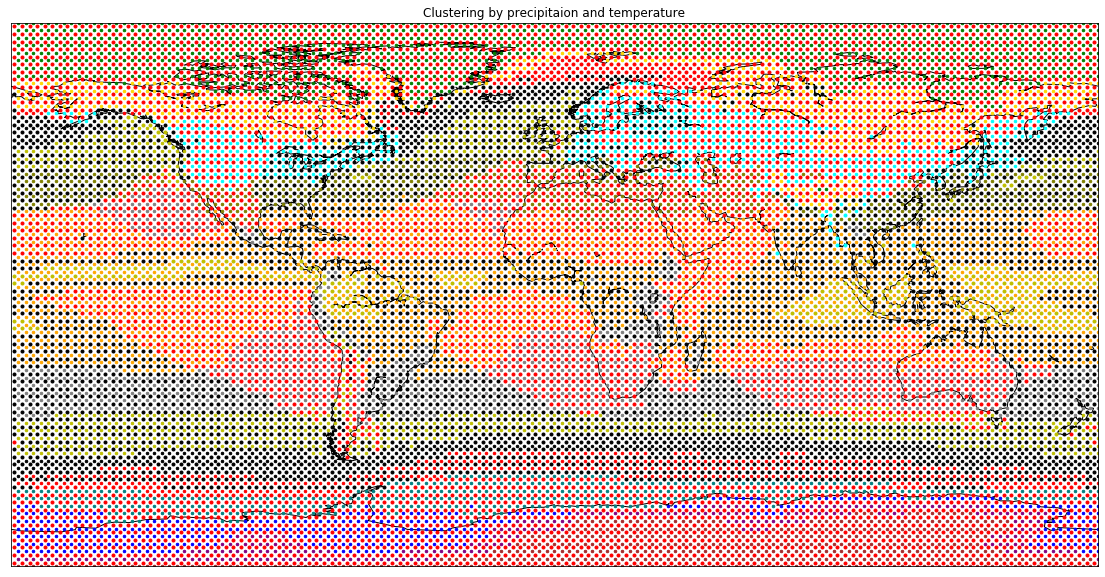

In [80]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\yunju\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
map = Basemap()

plt.figure(figsize=(22,10))
map.drawcoastlines()

#강수량     
for i in range(72):#위도
    for j in range(144):#경도
        if precip_lon_data[j]<=180:
            if KMeans.labels_[144*i+j]==0:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='red')
            if KMeans.labels_[144*i+j]==1:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='orange')
            if KMeans.labels_[144*i+j]==2:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='purple')         
            if KMeans.labels_[144*i+j]==3:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='green')            
            if KMeans.labels_[144*i+j]==4:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='blue') 
            if KMeans.labels_[144*i+j]==5:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='k')
            if KMeans.labels_[144*i+j]==6:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='gray')
            if KMeans.labels_[144*i+j]==7:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='brown')         
            if KMeans.labels_[144*i+j]==8:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='cyan')            
            if KMeans.labels_[144*i+j]==9:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='y')
            if KMeans.labels_[144*i+j]==10:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='teal') 
            if KMeans.labels_[144*i+j]==11:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='gold') 
            if KMeans.labels_[144*i+j]==12:
                a, b = map(precip_lon_data[j],precip_lat_data[i])
                map.plot(a, b, marker='.',color='ollive')                 
        if precip_lon_data[j]>180:
            if KMeans.labels_[144*i+j]==0:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='red')
            if KMeans.labels_[144*i+j]==1:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='orange')
            if KMeans.labels_[144*i+j]==2:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='purple')         
            if KMeans.labels_[144*i+j]==3:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='green')            
            if KMeans.labels_[144*i+j]==4:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='blue') 
            if KMeans.labels_[144*i+j]==5:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='k')                 
            if KMeans.labels_[144*i+j]==6:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='gray')
            if KMeans.labels_[144*i+j]==7:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='brown')         
            if KMeans.labels_[144*i+j]==8:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='cyan')            
            if KMeans.labels_[144*i+j]==9:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='y') 
            if KMeans.labels_[144*i+j]==10:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='teal') 
            if KMeans.labels_[144*i+j]==11:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='gold') 
            if KMeans.labels_[144*i+j]==12:
                a, b = map(precip_lon_data[j]-360,precip_lat_data[i])
                map.plot(a, b, marker='.',color='olive')             

#기온                
for i in range(73):#위도
    for j in range(144):#경도
        if air_lon_data[j]<=180:
            if KMeans.labels_[10368+144*i+j]==0:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='red',markersize=5)
            if KMeans.labels_[10368+144*i+j]==1:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='orange',markersize=5)
            if KMeans.labels_[10368+144*i+j]==2:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='purple',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==3:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='green',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==4:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='blue',markersize=5)
            if KMeans.labels_[10368+144*i+j]==5:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='k',markersize=5)
            if KMeans.labels_[10368+144*i+j]==6:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='gray',markersize=5)
            if KMeans.labels_[10368+144*i+j]==7:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='brown',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==8:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='cyan',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==9:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='y',markersize=5)  
            if KMeans.labels_[10368+144*i+j]==10:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='teal',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==11:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='gold',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==12:
                a, b = map(air_lon_data[j],air_lat_data[i])
                map.plot(a, b, marker='.',color='olive',markersize=5)                
        if air_lon_data[j]>180:
            if KMeans.labels_[10368+144*i+j]==0:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='red',markersize=5)
            if KMeans.labels_[10368+144*i+j]==1:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='orange',markersize=5)
            if KMeans.labels_[10368+144*i+j]==2:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='purple',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==3:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='green',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==4:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='blue',markersize=5)
            if KMeans.labels_[10368+144*i+j]==5:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='k',markersize=5)
            if KMeans.labels_[10368+144*i+j]==6:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='gray',markersize=5)
            if KMeans.labels_[10368+144*i+j]==7:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='brown',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==8:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='cyan',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==9:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='y',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==10:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='teal',markersize=5) 
            if KMeans.labels_[10368+144*i+j]==11:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='gold',markersize=5)    
            if KMeans.labels_[10368+144*i+j]==12:
                a, b = map(air_lon_data[j]-360,air_lat_data[i])
                map.plot(a, b, marker='.',color='olive',markersize=5)                 
                
plt.title('Clustering by precipitaion and temperature')
plt.show()